In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## MNIST data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(3,)


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1a1397ac50>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x105c86ac8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1a1397aa58>)

In [8]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [27]:
img = mnist.train.images[0]
np.shape(img)

(784,)

In [15]:
img = img.reshape((28, 28))
np.shape(img)

(28, 28)

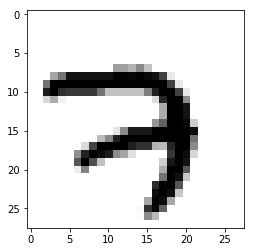

In [24]:
plt.imshow(img, cmap="gray_r") # inverse grayscale. Use 'gray' if we want background to be black and digit to be white
plt.show()

In [34]:
np.shape(mnist.train.labels)

(55000, 10)

## Build network

In [63]:
def add_layer(inputs, in_size, out_size, activation_function = None):
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_plus_b = tf.matmul(inputs, weights) + biases
    if activation_function is None:
        return wx_plus_b
    else:
        return activation_function(wx_plus_b)

In [64]:
xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None, 10])

In [65]:
# Only one layer
prediction = add_layer(xs, 784, 10, tf.nn.softmax)

In [66]:
# cross-entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), axis = 1))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [38]:
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    losses = []
    for i in range(10):
        session.run(train_step, feed_dict = {xs: mnist.train.images, ys: mnist.train.labels})
        losses.append(session.run(loss, feed_dict = {xs: mnist.train.images, ys: mnist.train.labels}))

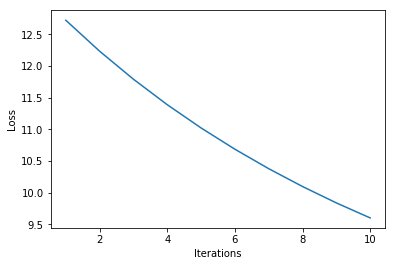

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(1, 10, 10), losses)
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
plt.show()

## Mini-batch

The above training is quite slow because every step we use the whole training set 55000 images. We can take a batch conveniently with mnist in tensorflow.

In [50]:
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    losses = []
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        session.run(train_step, feed_dict = {xs: batch_xs, ys: batch_ys})
        losses.append(session.run(loss, feed_dict = {xs: batch_xs, ys: batch_ys}))

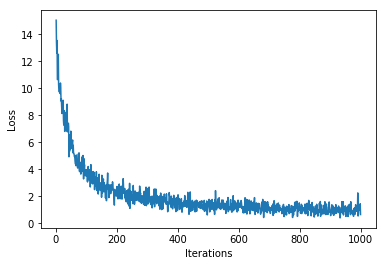

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(1, 1000, 1000), losses)
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
plt.show()

## Compute prediction accuracy

In [70]:
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        session.run(train_step, feed_dict = {xs: batch_xs, ys: batch_ys})
    # Accuracy
    result = session.run(prediction, feed_dict = {xs: mnist.test.images})
    result = np.argmax(result, axis = 1)
    original = np.argmax(mnist.test.labels, axis = 1)
    print("Accuracy: ", np.sum(result == original) / len(original))

Accuracy:  0.8104
